# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Liat 3181
# student 2: Or 8131 
# student 3: Miri 1601

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier





In [3]:

train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
print("train:")
train_data.head()



train:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
print("test:")
test_data.head()


test:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
print(train_data['Sex'].value_counts())

train_data.describe()


Sex
1    456
0    256
Name: count, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


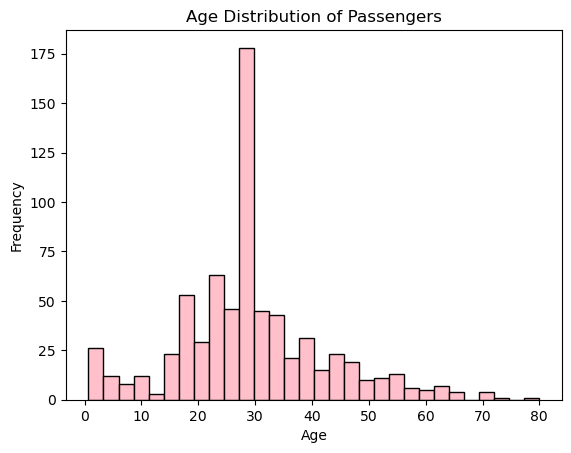

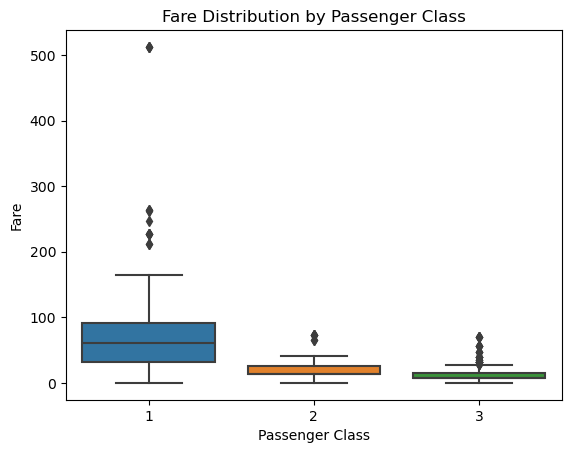

In [6]:
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='black', color='pink')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [7]:
#  Feature Engineering - create new column of family members 
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked']
X = train_data[features].copy()
y = train_data['Survived']

# fill missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)

#  Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Grid Search עם 5-fold Cross Validation עבור KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  # מרחק: 1 עבור Manhattan, 2 עבור Euclidean
}

knn_clf = KNeighborsClassifier()

# שימוש ב-GridSearchCV עם 5-fold cross-validation ו-macro F1 score
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_scaled, y)

# הצגת הפרמטרים והתוצאות המיטביות עבור KNN
print("KNN - Best parameters found: ", grid_search_knn.best_params_)
print("KNN - Best cross-validation F1 score: ", grid_search_knn.best_score_)

#  יצירת טבלה מסכמת של תוצאות הניסויים
results_knn_df = pd.DataFrame(grid_search_knn.cv_results_)
print(results_knn_df[['params', 'mean_test_score', 'rank_test_score']])


KNN - Best parameters found:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
KNN - Best cross-validation F1 score:  0.7868458785802845
                                               params  mean_test_score  \
0    {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}         0.774044   
1   {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}         0.757229   
2    {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}         0.786846   
3   {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.772028   
4    {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}         0.781091   
5   {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}         0.776781   
6    {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}         0.777478   
7   {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}         0.776381   
8    {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}         0.784889   
9   {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}         0.769853   
10   {'n_neighbors': 7, 'p': 2, 'weights': 'unifo

In [8]:
#  Feature Engineering - יצירת עמודות חדשות: חלוקת גיל לקטגוריות ויצירת קטגוריות מחיר
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=[0, 1, 2, 3, 4])
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=[0, 1, 2, 3])
test_data['AgeBin'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=[0, 1, 2, 3, 4])
test_data['FareBin'] = pd.cut(test_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=[0, 1, 2, 3])

#  יצירת עמודות חדשות נוספות ל-Feature Engineering מורכב יותר
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
train_data['FareClassMean'] = train_data.groupby('Pclass')['Fare'].transform('mean')

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)
test_data['FareClassMean'] = test_data.groupby('Pclass')['Fare'].transform('mean')

# טיפול בערכים חסרים בקטגוריות החדשות
train_data['AgeBin'].fillna(train_data['AgeBin'].mode()[0], inplace=True)
train_data['FareBin'].fillna(train_data['FareBin'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['AgeBin'].fillna(test_data['AgeBin'].mode()[0], inplace=True)
test_data['FareBin'].fillna(test_data['FareBin'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

#  בחירת תכונות רלוונטיות (כולל התכונות החדשות)
features = ['Pclass', 'Sex', 'AgeBin', 'FareBin', 'FamilySize', 'Embarked', 'IsAlone', 'FareClassMean']
X_train = train_data[features].copy()
y_train = train_data['Survived']

X_test = test_data[features].copy()

#  Scaling הנתונים (נורמליזציה)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  הגדרת האלגוריתם Decision Tree וה-Hyperparameters
dt_param_grid = {
    'criterion': ['gini', 'entropy'],    # פונקציית פיצול
    'max_depth': [None, 5, 10, 15],      # עומק מקסימלי של העץ
    'min_samples_split': [2, 5, 10]      # מינימום דוגמאות לפיצול צומת
}

dt_clf = DecisionTreeClassifier(random_state=42)

#  Grid Search עם 5-fold Cross Validation עבור Decision Tree
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_search.fit(X_train_scaled, y_train)

# הצגת הפרמטרים והתוצאות המיטביות עבור Decision Tree
print("Decision Tree - Best parameters found: ", dt_grid_search.best_params_)
print("Decision Tree - Best cross-validation F1 score: ", dt_grid_search.best_score_)

# תחזית על קבוצת הבדיקה
test_predictions = dt_grid_search.predict(X_test_scaled)

#  הצגת התוצאות
results_df = pd.DataFrame({'Passenger ,Survived': test_predictions})
print("\nDecision Tree Predictions on Test Set:")
print(results_df.head())

# שמירת התוצאות לקובץ CSV (אם יש צורך)
results_df.to_csv('titanic_decision_tree_predictions.csv', index=False)

Decision Tree - Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Decision Tree - Best cross-validation F1 score:  0.7947074361660377

Decision Tree Predictions on Test Set:
   Passenger ,Survived
0                    0
1                    0
2                    0
3                    1
4                    0


In [9]:
#  Feature Engineering - יצירת תכונות חדשות
# יצירת עמודת FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# יצירת עמודות AgeBin ו-FareBin
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=False)
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=False)

# טיפול בערכים חסרים
train_data['AgeBin'].fillna(train_data['AgeBin'].mode()[0], inplace=True)
train_data['FareBin'].fillna(train_data['FareBin'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

#בחירת תכונות רלוונטיות והגדרת היעד
features = ['Pclass', 'Sex', 'AgeBin', 'FareBin', 'FamilySize', 'Embarked']
X = train_data[features].copy()
y = train_data['Survived']

# קידוד תכונות קטגוריאליות לנתונים מספריים
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    X[col] = label_enc.fit_transform(X[col])

# Scaling הנתונים (אופציונלי עבור אלגוריתמים אלו)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# הגדרת האלגוריתמים וה-Hyperparameters

# Naive Bayes Classifier
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Hyperparameter לכוונון
}

nb_clf = GaussianNB()

# Decision Tree Classifier
dt_param_grid = {
    'criterion': ['gini', 'entropy'],    # Hyperparameter 1
    'max_depth': [None, 5, 10, 15],      # Hyperparameter 2
    'min_samples_split': [2, 5, 10]      # Hyperparameter 3
}

dt_clf = DecisionTreeClassifier(random_state=42)

# Grid Search עם 5-fold Cross Validation

# Grid Search עבור Naive Bayes
nb_grid_search = GridSearchCV(nb_clf, nb_param_grid, cv=5, scoring='f1_macro')
nb_grid_search.fit(X_scaled, y)

# Grid Search עבור Decision Tree
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_search.fit(X_scaled, y)

# הצגת הפרמטרים והתוצאות המיטביות

print("Naive Bayes - Best parameters found: ", nb_grid_search.best_params_)
print("Naive Bayes - Best cross-validation F1 score: ", nb_grid_search.best_score_)

print("Decision Tree - Best parameters found: ", dt_grid_search.best_params_)
print("Decision Tree - Best cross-validation F1 score: ", dt_grid_search.best_score_)

# יצירת טבלה מסכמת של תוצאות הניסויים

nb_results_df = pd.DataFrame(nb_grid_search.cv_results_)
dt_results_df = pd.DataFrame(dt_grid_search.cv_results_)

print("\nNaive Bayes Results:")
print(nb_results_df[['params', 'mean_test_score', 'rank_test_score']])

print("\nDecision Tree Results:")
print(dt_results_df[['params', 'mean_test_score', 'rank_test_score']])

Naive Bayes - Best parameters found:  {'var_smoothing': 1e-09}
Naive Bayes - Best cross-validation F1 score:  0.75795889516427
Decision Tree - Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Decision Tree - Best cross-validation F1 score:  0.7950666158088655

Naive Bayes Results:
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.757959                1
1  {'var_smoothing': 1e-08}         0.757959                1
2  {'var_smoothing': 1e-07}         0.757959                1

Decision Tree Results:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': None, 'min_...         0.779046   
1   {'criterion': 'gini', 'max_depth': None, 'min_...         0.784546   
2   {'criterion': 'gini', 'max_depth': None, 'min_...         0.793691   
3   {'criterion': 'gini', 'max_depth': 5, 'min_sam...         0.791595   
4   {'criterion': 'gini', 'max_depth'

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [10]:

# יצירת עמודת FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# יצירת עמודות AgeBin ו-FareBin
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=False)
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=False)
test_data['AgeBin'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=False)
test_data['FareBin'] = pd.cut(test_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=False)

# טיפול בערכים חסרים
train_data['AgeBin'].fillna(train_data['AgeBin'].mode()[0], inplace=True)
train_data['FareBin'].fillna(train_data['FareBin'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['AgeBin'].fillna(test_data['AgeBin'].mode()[0], inplace=True)
test_data['FareBin'].fillna(test_data['FareBin'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# בחירת תכונות רלוונטיות והגדרת היעד
features = ['Pclass', 'Sex', 'AgeBin', 'FareBin', 'FamilySize', 'Embarked']
X_train = train_data[features].copy()
y_train = train_data['Survived']
X_test = test_data[features].copy()

#  Scaling הנתונים
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# הגדרת המודל עם הפרמטרים המיטביים עבור Decision Tree (criterion='entropy', max_depth=5, min_samples_split=2)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=42)

#  אימון המודל מחדש על כל ה-Train עם הפרמטרים המיטביים
dt_clf.fit(X_train_scaled, y_train)

# תחזית על קבוצת הבדיקה (Test)
test_predictions = dt_clf.predict(X_test_scaled)

# הצגת התוצאות
results_df = pd.DataFrame({'Survived': test_predictions})
print("\nDecision Tree Predictions on Test Set:")
print(results_df.head(20))

#  שמירת התוצאות לקובץ CSV
results_df.to_csv('titanic_decision_tree_final_predictions.csv', index=False)



Decision Tree Predictions on Test Set:
    Survived
0          0
1          0
2          0
3          1
4          0
5          0
6          1
7          0
8          1
9          0
10         1
11         0
12         0
13         0
14         0
15         1
16         0
17         1
18         1
19         0


## Part 5 - Apply on test and show model performance estimation

In [11]:
# ביצוע Engineering Feature על סט הבדיקה בהתאם להגדרות מחלק 4
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['AgeBin'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=False)
test_data['FareBin'] = pd.cut(test_data['Fare'], bins=[-1, 7.91, 14.454, 31, 512], labels=False)
test_data['AgeBin'].fillna(test_data['AgeBin'].mode()[0], inplace=True)
test_data['FareBin'].fillna(test_data['FareBin'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# הכנת המאפיינים למודל
features = ['Pclass', 'Sex', 'AgeBin', 'FareBin', 'FamilySize', 'Embarked']
X_test = test_data[features]

# נורמליזציה של הנתונים
X_test_scaled = scaler.transform(X_test)

# חיזוי התוצאות על סט הבדיקה באמצעות המודל שהוגדר עם הפרמטרים המיטביים
test_predictions = dt_clf.predict(X_test_scaled)

# הצגת חמש התוצאות הראשונות
results_df = pd.DataFrame({'Survived': test_predictions})
print("\nDecision Tree Predictions on Test Set:")
print(results_df.head(5))

print("\nBest cross-validation F1 score from training:", dt_grid_search.best_score_)


Decision Tree Predictions on Test Set:
   Survived
0         0
1         0
2         0
3         1
4         0

Best cross-validation F1 score from training: 0.7950666158088655
